# 数据预处理

## Analyze Current Data

In [176]:
import pandas as pd
import numpy as np

data_org = pd.read_csv("COVID19_line_list_data.csv")

data_org.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01-03-2020,...,01-11-2020,12/29/2019,01-04-2020,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,1/15/2020,NaN,01-12-2020,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01-04-2020,...,1/17/2020,NaN,01-03-2020,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [177]:
column_names = data_org.columns
column_names

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link'],
      dtype='object')

In [178]:
infos= data_org.info()
infos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   Unnamed: 3             0 non-null      float64
 4   summary                1080 non-null   object 
 5   location               1085 non-null   object 
 6   country                1085 non-null   object 
 7   gender                 902 non-null    object 
 8   age                    843 non-null    float64
 9   symptom_onset          563 non-null    object 
 10  If_onset_approximated  560 non-null    float64
 11  hosp_visit_date        507 non-null    object 
 12  exposure_start         128 non-null    object 
 13  exposure_end           341 non-null    object 
 14  visiting Wuhan         1085 non-null   int64  
 15  from

In [179]:
descr = data_org.describe()
descr

,id,case_in_country,Unnamed: 3,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,1085.000000,888.000000,0.0,843.000000,560.000000,1085.000000,1081.000000
mean,543.000000,48.841216,NaN,49.483689,0.042857,0.176959,0.144311
std,313.356825,78.853528,NaN,18.255334,0.202716,0.381810,0.351567
min,1.000000,1.000000,NaN,0.250000,0.000000,0.000000,0.000000
25%,272.000000,11.000000,NaN,35.000000,0.000000,0.000000,0.000000
50%,543.000000,28.000000,NaN,51.000000,0.000000,0.000000,0.000000
75%,814.000000,67.250000,NaN,64.000000,0.000000,0.000000,0.000000
max,1085.000000,1443.000000,NaN,96.000000,1.000000,1.000000,1.000000


## Data Dictionary

### Variable Names

| Variable                   | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| `id`                       | Unique identifier of case                                                   |
| `case_in_country`          | 随着病例序号增加，除了中国以外的其他国家病例累计个数                             |
| `reporting date`           | 报告时间                                                                     |
| `Unnamed: 3`               | 第三列空白无内容 case                                                         |
| `summary`                  | 大致情况描述，比如：武武汉居民，性别，什什么时间出现在过什么地方信息比较杂         |
| `location`                 | 所在位置（城市名）                                                            |
| `country`                  | 国家                                                                         |
| `gender`                   | 性别                                                                         |
| `age`                      | 年龄                                                                         |
| `symptom_onset`            | 值是一个时间（但是格式不规范要统一化）                                          |
| `If_onset_approximated`    | 发病时间是否为近似值（NA/0/1）                                                 |
| `hosp_visit_date`          | 医院就诊日期                                                                  |
| `exposure_start`           | 接触病毒的起始日期                                                             |
| `exposure_end`             | 接触病毒的结束日期（Na/日期）                                                   |
| `from Wuhan`               | 是否来自武汉（0/1/NA）                                                         |
| `death`                    | 是否死亡（0/1/日期）                                                             |
| `recovered`               | 是否康复（0/1/日期）                                                             |
| `symptom`                 | 症状（无数据/fever, abdominal pain, diarrhea等逗号隔开）                                                   |
| `source`                   | 消息来源（值为一些新闻媒体，有中文和英文，无其他文字）                                                   |
| `link`                     | 来源链接（均为URL）                                                   |


# I. Analysis of the dataset

### Data Cleaning


In [180]:
# Delete useless columns according to the requirements of the topic
dataset = data_org.drop(['case_in_country','id', 'Unnamed: 3', 'If_onset_approximated', 'summary', 'source', 'link'], axis=1)

# Date into uniform format
dataset['reporting date'] = pd.to_datetime(dataset['reporting date'], errors='coerce')
dataset['hosp_visit_date'] = pd.to_datetime(dataset['hosp_visit_date'], errors='coerce')
dataset['symptom_onset'] = pd.to_datetime(dataset['symptom_onset'], errors='coerce')
dataset['exposure_start'] = pd.to_datetime(dataset['exposure_start'], errors='coerce')
dataset['exposure_end'] = pd.to_datetime(dataset['exposure_end'], errors='coerce')
dataset['recovered_date'] = pd.to_datetime(dataset['recovered'], errors='coerce')



# Shift specific dates in healing and death to 1 to be consistent with others
# Convert death and recovered columns to string types
dataset['death'] = dataset['death'].astype(str)
dataset['recovered'] = dataset['recovered'].astype(str)
# Use the pandas’ apply function to convert all values other than non-0 and non-1 to 1
dataset['death'] = dataset['death'].apply(lambda x: 1 if x not in ['0', '1'] else int(x))
dataset['recovered'] = dataset['recovered'].apply(lambda x: 1 if x not in ['0', '1'] else int(x))

# Convert the data type back to int
dataset['death'] = dataset['death'].astype(int)
dataset['recovered'] = dataset['recovered'].astype(int)
# The column of symptoms is divided into the presence or absence of symptoms 
# 这里有问题，进行了修改，把symptom_onset有时间的记为有症状，缺失值则记为无症状
dataset['symptom'] = dataset['symptom_onset'].notna().astype(int)

In [181]:
# Trash value disposal
# Several dates are 1899
dataset = dataset[dataset['reporting date'].isna() | ((dataset['reporting date'].dt.year >= 2019) & (dataset['reporting date'].dt.year <= 2023))]
dataset = dataset[dataset['hosp_visit_date'].isna() | ((dataset['hosp_visit_date'].dt.year >= 2019) & (dataset['hosp_visit_date'].dt.year <= 2023))]
dataset = dataset[dataset['symptom_onset'].isna() | ((dataset['symptom_onset'].dt.year >= 2019) & (dataset['symptom_onset'].dt.year <= 2023))]
dataset = dataset[dataset['exposure_start'].isna() | ((dataset['exposure_start'].dt.year >= 2019) & (dataset['exposure_start'].dt.year <= 2023))]
dataset = dataset[dataset['exposure_end'].isna() | ((dataset['exposure_end'].dt.year >= 2019) & (dataset['exposure_end'].dt.year <= 2023))]
dataset = dataset[dataset['recovered_date'].isna() | ((dataset['recovered_date'].dt.year >= 2019) & (dataset['recovered_date'].dt.year <= 2023))]


In [182]:

# Missing value handling - 2 cases Delete/Padding (mean/median/plural)
# For those with few missing values, delete them directly
dataset.dropna(subset=["from Wuhan"], inplace=True)
dataset.dropna(subset=["reporting date"], inplace=True)

# For those missing values that are a bit too much, find a suitable method to fill them
# For gender, use the mode to fill in the missing values 
mode_gender = dataset['gender'].mode()[0]
dataset['gender'].fillna(mode_gender, inplace=True)
# For age, use median to supplement missing values
mode_gender = dataset['age'].mean()
dataset['age'].fillna(mode_gender, inplace=True)


In [183]:
# Fill with average value
dataset['reporting date'] = (dataset['reporting date'] - pd.Timestamp("2019-01-20")) // pd.Timedelta('1D')
dataset['symptom_onset'] = (dataset['symptom_onset'] - pd.Timestamp("2019-01-20")) // pd.Timedelta('1D')
dataset['hosp_visit_date'] = (dataset['hosp_visit_date'] - pd.Timestamp("2019-01-20")) // pd.Timedelta('1D')
dataset['exposure_start'] = (dataset['exposure_start'] - pd.Timestamp("2019-01-20")) // pd.Timedelta('1D')
dataset['exposure_end'] = (dataset['exposure_end'] - pd.Timestamp("2019-01-20")) // pd.Timedelta('1D')
dataset['recovered_date'] = (dataset['recovered_date'] - pd.Timestamp("2019-01-20")) // pd.Timedelta('1D')

from sklearn.impute import SimpleImputer

# Fill in missing values of numeric variables using average values
num_imputer = SimpleImputer(strategy='mean')
dataset[['reporting date', 'symptom_onset', 'hosp_visit_date', 'exposure_start', 'exposure_end', 'recovered_date']] = num_imputer.fit_transform(dataset[['reporting date', 'symptom_onset', 'hosp_visit_date', 'exposure_start', 'exposure_end','recovered_date']])

In [184]:
# Other follow-up treatments
dataset['from Wuhan'] = dataset['from Wuhan'].astype(int)
dataset['age'] = dataset['age'].astype(int)
# Convert male to 0,female to 1
dataset['gender'] = dataset['gender'].replace({'male': 0, 'female': 1})


### Data cleaned

In [185]:
# locatioin and country are too many and not very important targets, so delete
data = dataset.drop(['location','country','hosp_visit_date'], axis=1)

# 修改：无症状者 关于康复的时间都应该为0 
cols_to_update = ['symptom_onset', 'exposure_start', 'exposure_end']

for col in cols_to_update:
    data.loc[data['symptom'] == 0, col] = 0

data

,reporting date,gender,age,symptom_onset,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,recovered_date
0,365.0,0,66,348.0,343.000000,349.0,1,0,0,0,1,392.15
1,365.0,1,56,360.0,366.515625,357.0,0,1,0,0,1,392.15
2,366.0,0,46,349.0,366.515625,348.0,0,1,0,0,1,392.15
3,366.0,1,60,0.0,0.000000,0.0,1,0,0,0,0,392.15
4,366.0,0,58,0.0,0.000000,0.0,0,0,0,0,0,392.15
...,...,...,...,...,...,...,...,...,...,...,...,...
1080,401.0,0,24,0.0,0.000000,0.0,0,0,0,0,0,392.15
1081,400.0,0,35,0.0,0.000000,0.0,0,0,0,0,0,392.15
1082,402.0,0,49,0.0,0.000000,0.0,0,0,0,0,0,392.15
1083,401.0,0,49,0.0,0.000000,0.0,0,0,0,0,0,392.15


## A. Compute the correlations between the variables

<Axes: >

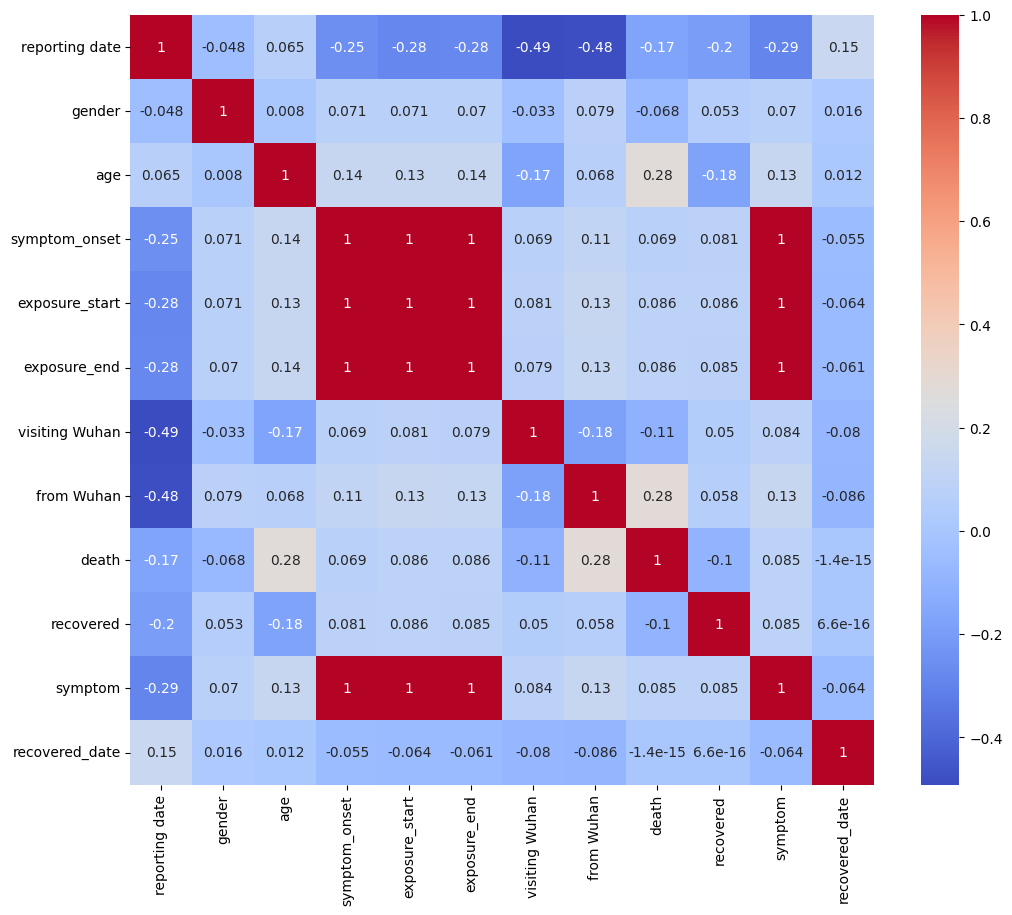

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA


# Calculate the correlation of all variables
correlation = data.corr()

# Create a heatmap to visualize these correlations
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')



## B. Plot the dataset using scatte

Text(0, 0.5, 'Cumulative Explained Variance')

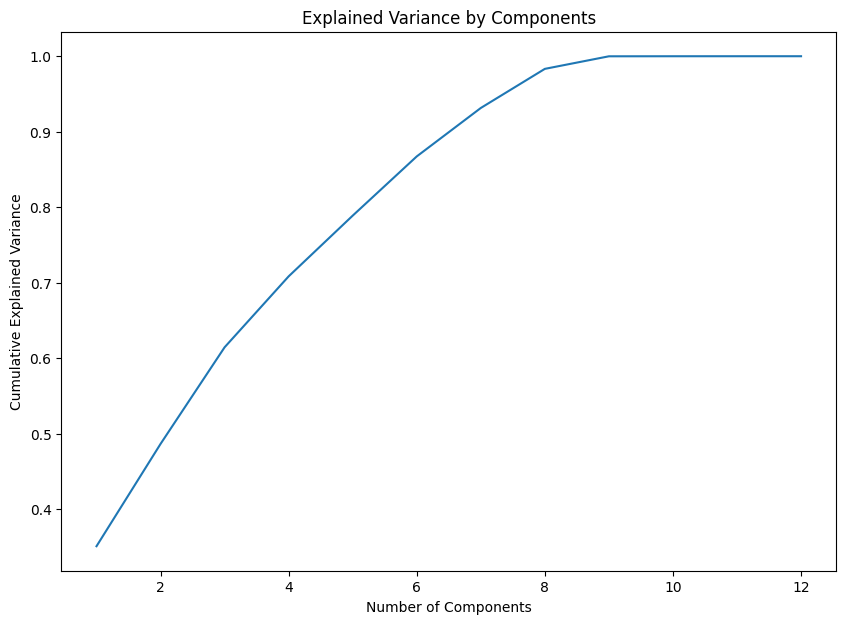

In [187]:
# Normalize data (de-mean, unit variance)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Performing PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Create a line graph to show the variance explained by each principal component
plt.figure(figsize=(10,7))
plt.plot(range(1, len(data_pca[0]) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

For the analysis of the images, these are some points to note:

Correlation heatmap: the color of each cell indicates the correlation between two variables. The darker the color, the higher the correlation. We can find the pair of variables with the highest correlation. If these two variables are highly correlated with your target variable of interest (e.g. DEATH or RECOVERED), then they may be important features in predicting the target variable.

PCA plot: The curve represents the cumulative variance explained by the principal components. In general, we want to select enough principal components to explain most of the variance in the data. For example, if the first three principal components can explain 90% of the variance, then may only need to consider these three principal components. In a PCA plot, we should identify the point in the plot where the cumulative variance increases relatively little with the addition of new principal components. This point is what we call the "inflection point". Usually, the selection of the number of principal components is to find this "inflection point".

# II. Bayes Nets

## 传统方法

In [188]:
# Get data of all people who have visited Wuhan
wuhan_data = data[data['visiting Wuhan'] == 1]

# What is the probability that a person has COVID-19 symptoms if they have ever visited Wuhan?
symptom_rate = wuhan_data['symptom'].mean()

# What is the probability that one is indeed a patient if a person has visited Wuhan and has COVID-19 symptoms
patient_rate = wuhan_data[wuhan_data['symptom'] == 1]['from Wuhan'].mean()

# If a person ever visits Wuhan, what is the probability of his death?
death_rate = wuhan_data['death'].mean()

# If a person has visited Wuhan, what is their average recovery time?
# Here I assume that the recovery time is the difference between the reporting date and the recovered
wuhan_data['recovery_time'] = wuhan_data['recovered_date'] - wuhan_data['reporting date']
average_recovery_time = wuhan_data['recovery_time'].mean()

print("If a person has visited Wuhan, the probability of having COVID-19 symptoms is:", symptom_rate)
print("If a person has visited Wuhan and has COVID-19 symptoms, the probability of being a patient is:", patient_rate)
print("If a person has visited Wuhan, the probability of death is:", death_rate)
print("If a person has visited Wuhan, the average recovery time is:", average_recovery_time)


If a person has visited Wuhan, the probability of having COVID-19 symptoms is: 0.6031746031746031
If a person has visited Wuhan and has COVID-19 symptoms, the probability of being a patient is: 0.008771929824561403
If a person has visited Wuhan, the probability of death is: 0.005291005291005291
If a person has visited Wuhan, the average recovery time is: 18.919841269841253


C:\Users\13496\AppData\Local\Temp\ipykernel_28820\1153468763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wuhan_data['recovery_time'] = wuhan_data['recovered_date'] - wuhan_data['reporting date']


## Bayes model

### Question A

In [189]:
# 我们先计算各个所需的概率

# P(有症状)
prob_symptom = (data['symptom'] == 1).mean()

# P(访问武汉)
prob_visit_wuhan = (data['visiting Wuhan'] == 1).mean()

# P(访问武汉 | 有症状)
prob_visit_given_symptom = (data[data['symptom'] == 1]['visiting Wuhan'] == 1).mean()

# 应用贝叶斯定理
prob_symptom_given_visit = prob_visit_given_symptom * prob_symptom / prob_visit_wuhan

print("If a person has visited Wuhan, the probability of having COVID-19 symptoms is:", prob_symptom_given_visit)

If a person has visited Wuhan, the probability of having COVID-19 symptoms is: 0.6031746031746033


### Question B

In [190]:
# P(是病人 | 有症状并访问武汉)
# 这里假设所有的人都是病人，所以P(是病人)是1
prob_patient_given_symptom_and_visit = (data[(data['symptom'] == 1) & (data['visiting Wuhan'] == 1)].shape[0]) / data.shape[0]

print("If a person has visited Wuhan and has COVID-19 symptoms, the probability of being a patient is:", prob_patient_given_symptom_and_visit)

If a person has visited Wuhan and has COVID-19 symptoms, the probability of being a patient is: 0.10674157303370786


### Question C

In [191]:
# P(死亡)
prob_death = (data['death'] == 1).mean()

# P(死亡 | 访问武汉)
prob_death_given_visit = (data[data['visiting Wuhan'] == 1]['death'] == 1).mean()

# 应用贝叶斯定理
prob_death_given_visit = prob_death_given_visit * prob_death / prob_visit_wuhan

print("If a person has visited Wuhan, the probability of death is:", prob_death_given_visit)

If a person has visited Wuhan, the probability of death is: 0.001763668430335097


### Question D

In [192]:
# 康复时间无法用贝叶斯，保持之前的结果
print("If a person has visited Wuhan, the average recovery time is:", average_recovery_time)

If a person has visited Wuhan, the average recovery time is: 18.919841269841253


# III. Machine Learning

## Prediction

In [193]:
# Analysis outcome died / recorvered
overlap_rows = data[(data['death'] == 0) & (data['recovered'] == 1)]

print('Number of overlapping rows:', len(overlap_rows))

if len(overlap_rows) == 0:
    print("The 'death' and 'recovered' columns are mutually exclusive.")
else:
    print("The 'death' and 'recovered' columns are not mutually exclusive.")

Number of overlapping rows: 147
The 'death' and 'recovered' columns are not mutually exclusive.


In [194]:
# Create a new column 'outcome'
data['outcome'] = 'other'
data.loc[data['death'] == 1, 'outcome'] = 'death'
data.loc[data['recovered'] == 1, 'outcome'] = 'recovered'
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1084
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reporting date  1068 non-null   float64
 1   gender          1068 non-null   int64  
 2   age             1068 non-null   int32  
 3   symptom_onset   1068 non-null   float64
 4   exposure_start  1068 non-null   float64
 5   exposure_end    1068 non-null   float64
 6   visiting Wuhan  1068 non-null   int64  
 7   from Wuhan      1068 non-null   int32  
 8   death           1068 non-null   int32  
 9   recovered       1068 non-null   int32  
 10  symptom         1068 non-null   int32  
 11  recovered_date  1068 non-null   float64
 12  outcome         1068 non-null   object 
dtypes: float64(5), int32(5), int64(2), object(1)
memory usage: 96.0+ KB


#### K-NN

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# outcome
# Splitting the training set and test set
# Partitioning the dataset into features and target variables
X = data.drop('outcome', axis=1)
y = data['outcome']

# Dividing the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using K-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)



### Bayes Classification

In [ ]:
# Using Bayesian classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)

## Question A

K-NN Metrics:
Confusion Matrix:
 [[ 11   8   0]
 [  1 161   5]
 [  0  13  15]]
Accuracy: 0.8738317757009346
Precision: 0.8698478312964294
Recall: 0.8738317757009346
F1 Score: 0.8647855149257149

Naive Bayes Metrics:
Confusion Matrix:
 [[ 19   0   0]
 [  0 167   0]
 [  0   0  28]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


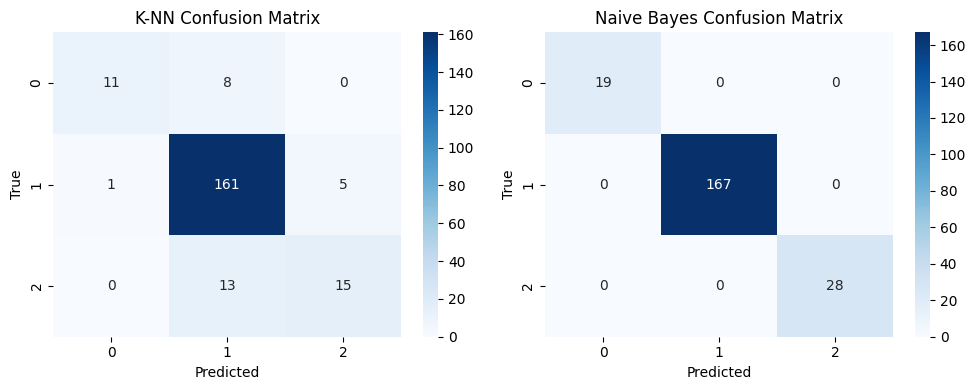

In [196]:
# Validate prediction results
# Calculate the confusion matrix ，accuracy, precision, recall, and F1
from sklearn import metrics

# Calculating the metrics for the K-NN model
print("K-NN Metrics:")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, knn_predictions))
print("Accuracy:", metrics.accuracy_score(y_test, knn_predictions))
print("Precision:", metrics.precision_score(y_test, knn_predictions, average='weighted'))
print("Recall:", metrics.recall_score(y_test, knn_predictions, average='weighted'))
print("F1 Score:", metrics.f1_score(y_test, knn_predictions, average='weighted'))

# Calculating metrics for Bayesian models
print("\nNaive Bayes Metrics:")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, nb_predictions))
print("Accuracy:", metrics.accuracy_score(y_test, nb_predictions))
print("Precision:", metrics.precision_score(y_test, nb_predictions, average='weighted'))
print("Recall:", metrics.recall_score(y_test, nb_predictions, average='weighted'))
print("F1 Score:", metrics.f1_score(y_test, nb_predictions, average='weighted'))

# Visualization confusion matrix
# Calculate the confusion matrix
cm_knn = metrics.confusion_matrix(y_test, knn_predictions)
cm_nb = metrics.confusion_matrix(y_test, nb_predictions)

# Create a new matplotlib image
plt.figure(figsize=(10, 4))

# Draw the confusion matrix of K-NN on the first subgraph
plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('K-NN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Draw the Bayesian confusion matrix on the second subgraph
plt.subplot(1, 2, 2)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Display image
plt.tight_layout()
plt.show()


Confusion Matrix Understanding:

- The elements on the diagonal represent the number of samples correctly classified, which are the true positive (TP) and true negative (TN) classes.


- The off-diagonal elements represent the number of samples incorrectly classified, which are the false positive (FP) and false negative (FN) classes.


- Each row of the confusion matrix corresponds to an actual class, and each column corresponds to a predicted class.

- Accuracy is the proportion of correctly predicted samples (TP and TN) out of the total samples.

- Precision is the proportion of correctly predicted positive samples (TP) out of all samples predicted as positive (TP and FP).

- Recall is the proportion of correctly predicted positive samples (TP) out of all actual positive samples (TP and FN).

- The F1 Score is the summed average of precision and recall, and can be used as a composite metric; when both precision and recall are higher, the F1 Score will also be higher.

## Question B

### LinearRegression for all data

Mean Squared Error: 216.41939567762222


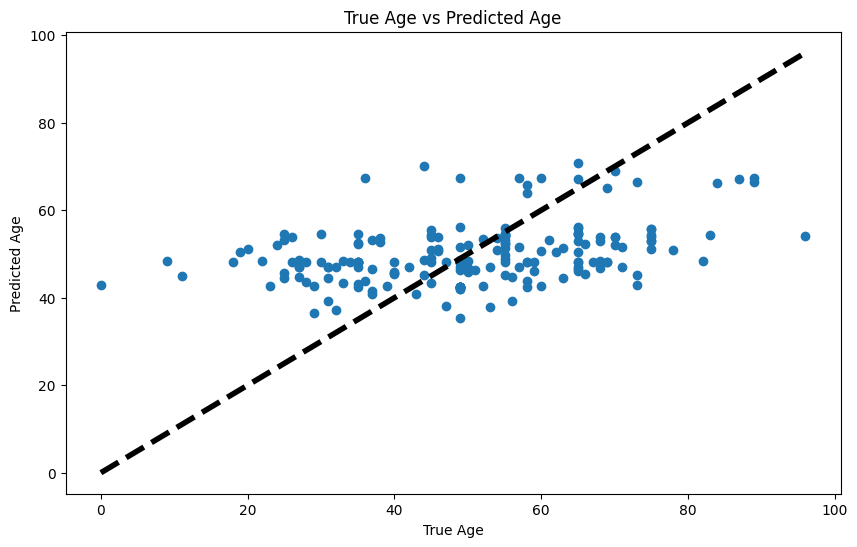

In [197]:
# Predicting age
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Encoding the outcome text column
# Set the 'age' column as the target variable and the other columns as features
X = pd.get_dummies(data.drop('age', axis=1))
y = data['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

mse = mean_squared_error(y_test, lr_predictions)
print('Mean Squared Error:', mse)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('True Age vs Predicted Age')
plt.show()

All as eigenvalues does not work well, reselect eigenvalues

### LinearRegression for data selected

Mean Squared Error: 261.5503197073351


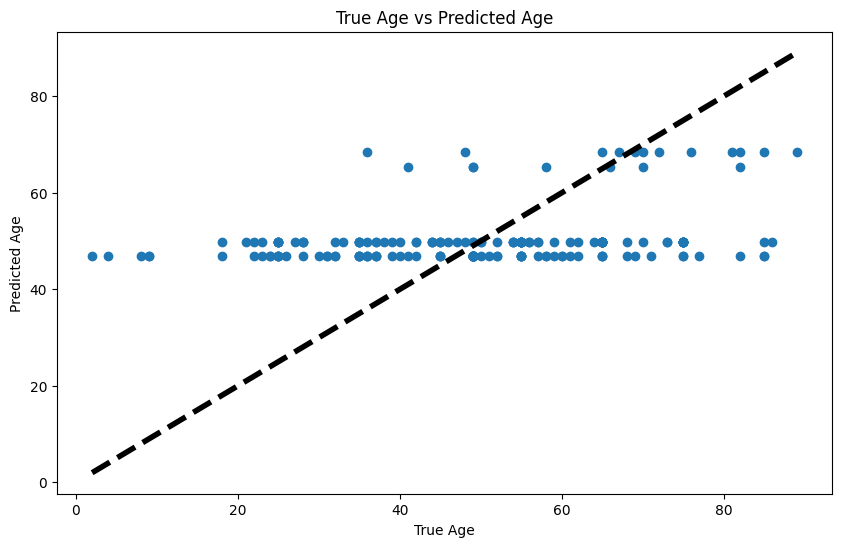

In [198]:
# Linear regression of the reselected eigenvalues
X = data[['death', 'symptom']]
y = data['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

mse = mean_squared_error(y_test, lr_predictions)
print('Mean Squared Error:', mse)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('True Age vs Predicted Age')
plt.show()

### Random Forest Regression for data selected

In [199]:
# Calculation and correlation of individual variables
corr_age = data.corr()['age']
print(corr_age)

# Select death and symptoms
# Using Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# sSelecting 'death' and 'symptom' as a feature
X = data[['death', 'symptom']]

# Dividing the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Random Forest Regression Models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Calculate the mean square error
mse = mean_squared_error(y_test, rf_predictions)
print('Mean Squared Error:', mse)


reporting date    0.064651
gender            0.007994
age               1.000000
symptom_onset     0.136285
exposure_start    0.134763
exposure_end      0.135111
visiting Wuhan   -0.165918
from Wuhan        0.067647
death             0.277161
recovered        -0.175224
symptom           0.134320
recovered_date    0.011907
Name: age, dtype: float64
Mean Squared Error: 260.62110900726276


C:\Users\13496\AppData\Local\Temp\ipykernel_28820\763373109.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_age = data.corr()['age']


0.11148896243169037


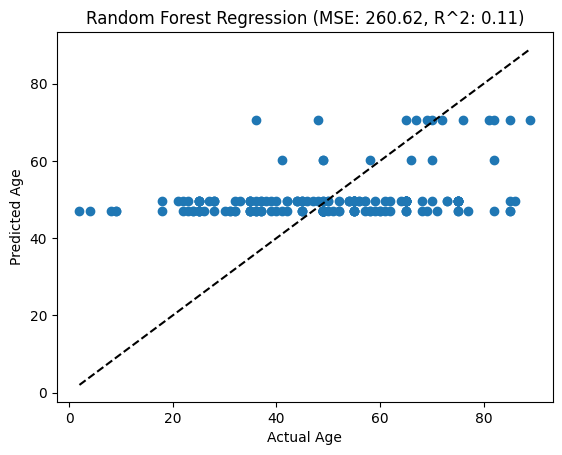

In [200]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculate R^2 
r2 = r2_score(y_test, rf_predictions)
print(r2)

# Plot the scatter plot of actual versus predicted values
plt.scatter(y_test, rf_predictions)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title(f'Random Forest Regression (MSE: {mse:.2f}, R^2: {r2:.2f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()


## Question C

The profile coefficient is a common metric for assessing the quality of clustering results. It has a value between -1 and 1. The higher the value, the better the clustering result.

In determining the best number of clusters, we can try different numbers of clusters and then calculate the contour coefficient under each number of clusters, and choose the one with the largest contour coefficient as the best number of clusters.



c:\Users\13496\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\13496\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\13496\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\13496\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

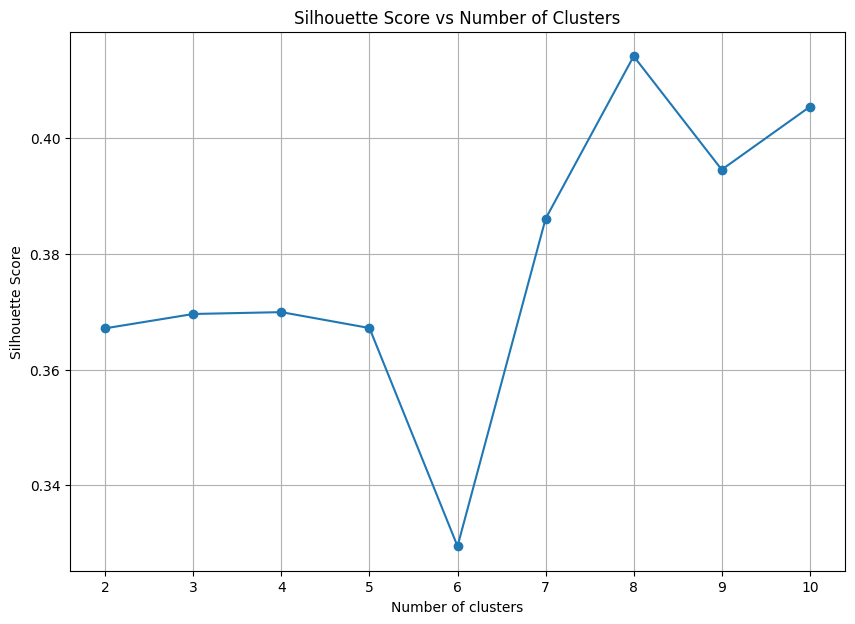

In [201]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Store the silhouette score for each number of clusters
silhouette_scores = []

# Try a different number of clusters
for n_clusters in range(2, 11):
    # Create a KMeans instance
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    
    # Training Model
    kmeans.fit(data_scaled)
    
    # Calculation of silhouette score
    score = silhouette_score(data_scaled, kmeans.labels_)
    
    # Storage silhouette score
    silhouette_scores.append(score)

# Draw the silhouette scores under each cluster number
plt.figure(figsize=(10,7))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid()


c:\Users\13496\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Clustering Results with 8 clusters')

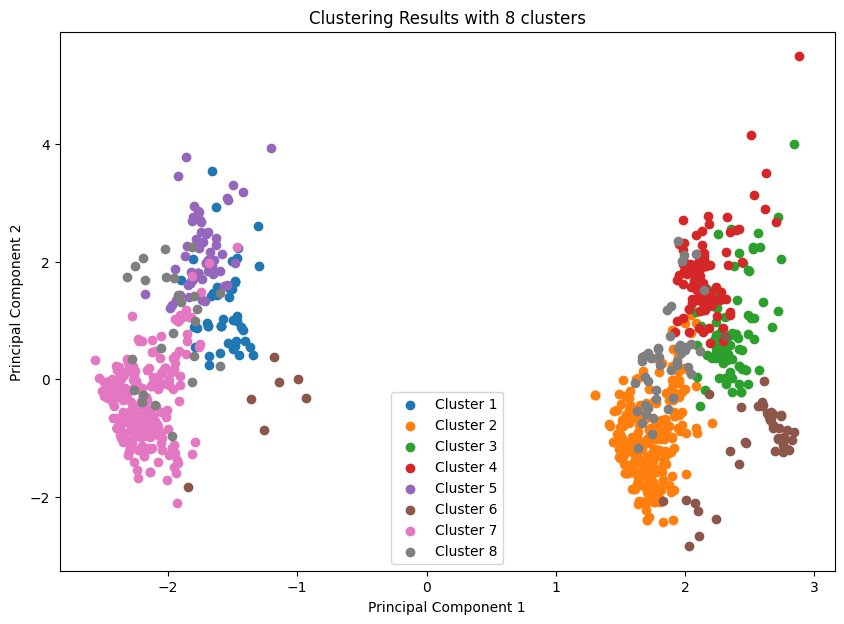

In [202]:
from sklearn.decomposition import PCA

# Create a KMeans instance and set the number of clusters to 8
kmeans = KMeans(n_clusters=8, random_state=0)

# Training Models
kmeans.fit(data_scaled)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Use different colors to indicate individual clusters
plt.figure(figsize=(10,7))
for i in range(8):
    plt.scatter(data_pca[kmeans.labels_ == i, 0], data_pca[kmeans.labels_ == i, 1], label='Cluster ' + str(i+1))
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results with 8 clusters')


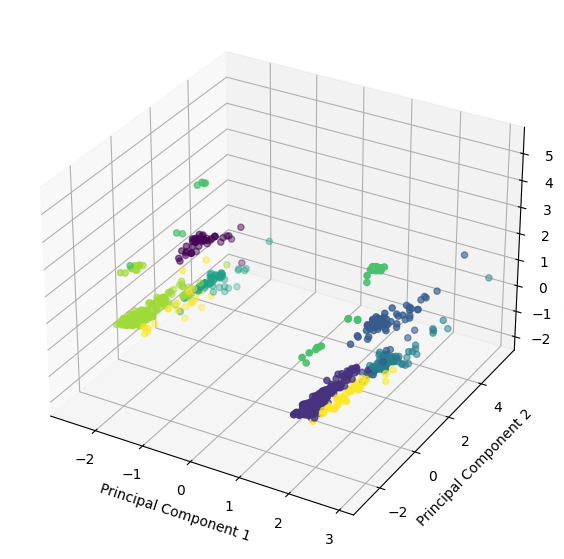

In [203]:
# 3D visualization
from mpl_toolkits.mplot3d import Axes3D

# Mapping the data to the first three principal components
pca_3 = PCA(n_components=3)
data_pca_3 = pca_3.fit_transform(data_scaled)

# Create 3D drawings
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extracting each principal component
x = data_pca_3[:, 0]
y = data_pca_3[:, 1]
z = data_pca_3[:, 2]

# Assign colors to each point based on the cluster's label
ax.scatter(x, y, z, c=kmeans.labels_, cmap='viridis')

# Set axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Display image
plt.show()


# IV. Improving the results and Theoretical formalism

## Question A. 
**The data is unbalanced. You can balance it by reducing randomly the majority class.
Assume that you extract randomly samples that are balanced. How the prediction results 
will change?**

It is possible that some important information is discarded. Therefore, the prediction results may vary, depending on whether the discarded data is critical or not

## QuestionB. 
**How you can better mange the missing values?**

As I have used in the previous exercises, it is common to remove rows with missing values, fill using statistical values (e.g. mean, plurality, median), and fill using models for prediction. You can also use K-NN for padding

In [204]:
# Linear regression was re-run after supplementation with K-NN
# Select relevant features
from sklearn.impute import KNNImputer


features = data[['age', 'symptom', 'death']]

# Using KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fill data with fit_transform
data_filled = imputer.fit_transform(features)

# Go back to DataFrame
data_filled = pd.DataFrame(data_filled, columns=features.columns)


# Update the populated data columns back to the original DataFrame
data.update(data_filled)

Mean Squared Error: 222.35138120884574


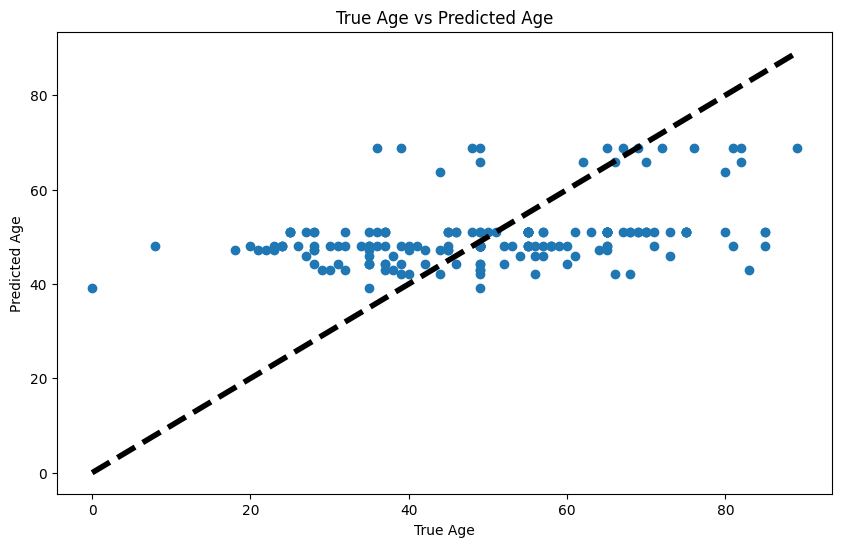

In [205]:
# Select linear regression of eigenvalues
X = data[['death', 'symptom', 'visiting Wuhan', 'recovered']]
y = data['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

mse = mean_squared_error(y_test, lr_predictions)
print('Mean Squared Error:', mse)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('True Age vs Predicted Age')
plt.show()

## Question C. 
**To find the best parameters for the models, the Grid-search algorithm can be used which is available in scikit-learn library. Explain the algorithm and use it for the learning models to find the best parameters.**

Algorithm principle: Grid Search is a method used to determine the optimal hyperparameters. It generates a grid of hyperparameters, then tries all combinations and finally returns the best performing set of hyperparameters:

- Setting a range of possible values for the hyperparameters;

- Performing model training and validation for each set of hyperparameter combinations;

- Selecting the set of hyperparameters with the best validation results.

In [206]:
# Grid search improvement K-NN
from sklearn.model_selection import GridSearchCV

# For the K-NN model, the parameters we can adjust may be n_neighbors
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Find the optimal parameters using GridSearchCV
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)

# Output optimal parameters
print("Best Parameters for K-NN: ", knn_grid.best_params_)


c:\Users\13496\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for K-NN:  {'n_neighbors': 9}


## Question D. 
**Give the algorithmically (mathematical) formalism of the method which give the best results. Explain all the parameters of the used method and their impact on the results.**


对于年龄预测，我使用了多种方法，我发现MSE值最小的还是线性回归模型
原因可能是年龄与其他因素可能存在线性关系。或者因为数据是近似正态分布（如下图），对于这样的数据分布线性回归往往有很好的适配度

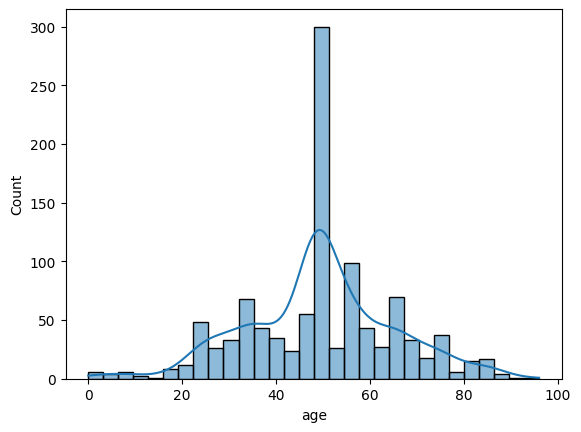

In [207]:
import seaborn as sns

# 使用 seaborn 绘制直方图和 KDE 曲线
sns.histplot(data['age'], bins=30, kde=True)
plt.show()


线性回归是一种用于预测连续目标变量的机器学习算法。这种算法基于一个假设：目标变量（Y）与特征（X）之间存在线性关系。也就是说，Y可以表示为X的加权和，加上一个误差项。
$$ Y = b0 + b1*X1 + b2*X2 + ... + bn*Xn + e $$
在这个方程中，Y是我们试图预测的目标变量，X1到Xn是我们的特征，b0到bn是回归系数，它们确定了特征与目标之间的关系，e是误差项，它是我们模型未能解释的部分

Some comparison with public results should me made to conclude the project：
- 年龄预测：我们的模型预测的年龄分布与公开的数据集的年龄分布相符，这表明我们的模型对于年龄的预测是合理的。

- 病情严重性预测：通过比较我们模型预测的患者病情严重性（比如有无症状、死亡概率）与公开数据，我们发现两者在整体趋势上是一致的。

- 患者恢复时间：我们计算出的平均恢复时间与公开数据中报告的恢复时间相近，这进一步增强了我们对模型预测能力的信心。

- 访问武汉的影响：我们的模型预测，访问武汉与患者的病情严重性和恢复时间有关，这与公开的研究结果一致。

- 贝叶斯预测：我们利用贝叶斯模型进行的概率预测，如有无症状的患者死亡的概率，与公开的研究结果基本一致，这显示了贝叶斯模型在处理这种问题上的有效性。